In [1]:
import bempp.api
from bempp.api.assembly.blocked_operator import BlockedOperator
import numpy as np
from numpy.linalg import slogdet
import matplotlib.pyplot as plt
%matplotlib inline
#bempp.api.enable_console_logging()

Compute the ratio $\frac{Z}{R}$, where $Z$ is the surface-surface distance between two spheres, and $R = 1$. 

In [2]:
N_wn = 15
lbound_wn = .05    # lower bound of k in ik
ubound_wn = 4      # upper bound of k in ik
quad_points = np.linspace(np.exp(-ubound_wn), np.exp(-lbound_wn), N_wn)
result_wn = np.empty(N_wn, dtype='float64')

N_Z = 15
lbound_Z = 0.5  # lower bound of Z
ubound_Z = 4.0  # upper bound of Z
surf_dist = np.linspace(lbound_Z, ubound_Z, N_Z)

#Casimir_energy = np.empty((len(surf_dist),5), dtype='float64')

In [ ]:
# Two unit spheres' case 
h1 = 0.5
for index2, point2 in enumerate(surf_dist):

    center1 = ((point2/2) + 1, 0, 0)
    center2 = (-((point2/2) + 1), 0, 0)
    sphere1 = bempp.api.shapes.sphere(h=h1, origin=center1)
    sphere2 = bempp.api.shapes.sphere(h=h1, origin=center2)

    rwg1 = bempp.api.function_space(sphere1, "RWG", 0)
    rwg2 = bempp.api.function_space(sphere2, "RWG", 0)

    snc1 = bempp.api.function_space(sphere1, "SNC", 0)
    snc2 = bempp.api.function_space(sphere2, "SNC", 0)

    for index3, point3 in enumerate(quad_points):

        wavenumber = -1j * np.log(point3)
        op11 = bempp.api.operators.boundary.maxwell.electric_field(rwg1, rwg1, snc1, wavenumber)
        op22 = bempp.api.operators.boundary.maxwell.electric_field(rwg2, rwg2, snc2, wavenumber)
        op21 = bempp.api.operators.boundary.maxwell.electric_field(rwg1, rwg2, snc2, wavenumber)
        op12 = bempp.api.operators.boundary.maxwell.electric_field(rwg2, rwg1, snc1, wavenumber)

        blocked_op = BlockedOperator(2, 2)
        blocked_op[0, 0] = op11
        blocked_op[0, 1] = op12
        blocked_op[1, 0] = op21
        blocked_op[1, 1] = op22

        blocked_diag = BlockedOperator(2, 2)
        blocked_diag[0, 0] = op11
        blocked_diag[1, 1] = op22

        mat = np.real(bempp.api.as_matrix(blocked_op.weak_form()))
        mat2 = np.real(bempp.api.as_matrix(blocked_diag.weak_form()))
        combined = np.linalg.inv(mat2).dot(mat)
        sign, logdet = slogdet(combined)
        result_wn[index3] = logdet

    Casimir_energy[index2,0] = np.trapz(-result_wn / quad_points, quad_points) / (2 * np.pi)

In [ ]:
# Two unit spheres' case 
h2 = 0.4
for index2, point2 in enumerate(surf_dist):

    center1 = ((point2/2) + 1, 0, 0)
    center2 = (-((point2/2) + 1), 0, 0)
    sphere1 = bempp.api.shapes.sphere(h=h2, origin=center1)
    sphere2 = bempp.api.shapes.sphere(h=h2, origin=center2)

    rwg1 = bempp.api.function_space(sphere1, "RWG", 0)
    rwg2 = bempp.api.function_space(sphere2, "RWG", 0)

    snc1 = bempp.api.function_space(sphere1, "SNC", 0)
    snc2 = bempp.api.function_space(sphere2, "SNC", 0)

    for index3, point3 in enumerate(quad_points):

        wavenumber = -1j * np.log(point3)
        op11 = bempp.api.operators.boundary.maxwell.electric_field(rwg1, rwg1, snc1, wavenumber)
        op22 = bempp.api.operators.boundary.maxwell.electric_field(rwg2, rwg2, snc2, wavenumber)
        op21 = bempp.api.operators.boundary.maxwell.electric_field(rwg1, rwg2, snc2, wavenumber)
        op12 = bempp.api.operators.boundary.maxwell.electric_field(rwg2, rwg1, snc1, wavenumber)

        blocked_op = BlockedOperator(2, 2)
        blocked_op[0, 0] = op11
        blocked_op[0, 1] = op12
        blocked_op[1, 0] = op21
        blocked_op[1, 1] = op22

        blocked_diag = BlockedOperator(2, 2)
        blocked_diag[0, 0] = op11
        blocked_diag[1, 1] = op22

        mat = np.real(bempp.api.as_matrix(blocked_op.weak_form()))
        mat2 = np.real(bempp.api.as_matrix(blocked_diag.weak_form()))
        combined = np.linalg.inv(mat2).dot(mat)
        sign, logdet = slogdet(combined)
        result_wn[index3] = logdet

    Casimir_energy[index2,1] = np.trapz(-result_wn / quad_points, quad_points) / (2 * np.pi)

In [ ]:
# Two unit spheres' case 
h3 = 0.3
for index2, point2 in enumerate(surf_dist):

    center1 = ((point2/2) + 1, 0, 0)
    center2 = (-((point2/2) + 1), 0, 0)
    sphere1 = bempp.api.shapes.sphere(h=h3, origin=center1)
    sphere2 = bempp.api.shapes.sphere(h=h3, origin=center2)

    rwg1 = bempp.api.function_space(sphere1, "RWG", 0)
    rwg2 = bempp.api.function_space(sphere2, "RWG", 0)

    snc1 = bempp.api.function_space(sphere1, "SNC", 0)
    snc2 = bempp.api.function_space(sphere2, "SNC", 0)

    for index3, point3 in enumerate(quad_points):

        wavenumber = -1j * np.log(point3)
        op11 = bempp.api.operators.boundary.maxwell.electric_field(rwg1, rwg1, snc1, wavenumber)
        op22 = bempp.api.operators.boundary.maxwell.electric_field(rwg2, rwg2, snc2, wavenumber)
        op21 = bempp.api.operators.boundary.maxwell.electric_field(rwg1, rwg2, snc2, wavenumber)
        op12 = bempp.api.operators.boundary.maxwell.electric_field(rwg2, rwg1, snc1, wavenumber)

        blocked_op = BlockedOperator(2, 2)
        blocked_op[0, 0] = op11
        blocked_op[0, 1] = op12
        blocked_op[1, 0] = op21
        blocked_op[1, 1] = op22

        blocked_diag = BlockedOperator(2, 2)
        blocked_diag[0, 0] = op11
        blocked_diag[1, 1] = op22

        mat = np.real(bempp.api.as_matrix(blocked_op.weak_form()))
        mat2 = np.real(bempp.api.as_matrix(blocked_diag.weak_form()))
        combined = np.linalg.inv(mat2).dot(mat)
        sign, logdet = slogdet(combined)
        result_wn[index3] = logdet

    Casimir_energy[index2,2] = np.trapz(-result_wn / quad_points, quad_points) / (2 * np.pi)

In [ ]:
# Two unit spheres' case 
h4 = 0.2
for index2, point2 in enumerate(surf_dist):

    center1 = ((point2/2) + 1, 0, 0)
    center2 = (-((point2/2) + 1), 0, 0)
    sphere1 = bempp.api.shapes.sphere(h=h4, origin=center1)
    sphere2 = bempp.api.shapes.sphere(h=h4, origin=center2)

    rwg1 = bempp.api.function_space(sphere1, "RWG", 0)
    rwg2 = bempp.api.function_space(sphere2, "RWG", 0)

    snc1 = bempp.api.function_space(sphere1, "SNC", 0)
    snc2 = bempp.api.function_space(sphere2, "SNC", 0)

    for index3, point3 in enumerate(quad_points):

        wavenumber = -1j * np.log(point3)
        op11 = bempp.api.operators.boundary.maxwell.electric_field(rwg1, rwg1, snc1, wavenumber)
        op22 = bempp.api.operators.boundary.maxwell.electric_field(rwg2, rwg2, snc2, wavenumber)
        op21 = bempp.api.operators.boundary.maxwell.electric_field(rwg1, rwg2, snc2, wavenumber)
        op12 = bempp.api.operators.boundary.maxwell.electric_field(rwg2, rwg1, snc1, wavenumber)

        blocked_op = BlockedOperator(2, 2)
        blocked_op[0, 0] = op11
        blocked_op[0, 1] = op12
        blocked_op[1, 0] = op21
        blocked_op[1, 1] = op22

        blocked_diag = BlockedOperator(2, 2)
        blocked_diag[0, 0] = op11
        blocked_diag[1, 1] = op22

        mat = np.real(bempp.api.as_matrix(blocked_op.weak_form()))
        mat2 = np.real(bempp.api.as_matrix(blocked_diag.weak_form()))
        combined = np.linalg.inv(mat2).dot(mat)
        sign, logdet = slogdet(combined)
        result_wn[index3] = logdet

    Casimir_energy[index2,3] = np.trapz(-result_wn / quad_points, quad_points) / (2 * np.pi)

In [ ]:
# Two unit spheres' case 
h5 = 0.1
for index2, point2 in enumerate(surf_dist):

    center1 = ((point2/2) + 1, 0, 0)
    center2 = (-((point2/2) + 1), 0, 0)
    sphere1 = bempp.api.shapes.sphere(h=h5, origin=center1)
    sphere2 = bempp.api.shapes.sphere(h=h5, origin=center2)

    rwg1 = bempp.api.function_space(sphere1, "RWG", 0)
    rwg2 = bempp.api.function_space(sphere2, "RWG", 0)

    snc1 = bempp.api.function_space(sphere1, "SNC", 0)
    snc2 = bempp.api.function_space(sphere2, "SNC", 0)

    for index3, point3 in enumerate(quad_points):

        wavenumber = -1j * np.log(point3)
        op11 = bempp.api.operators.boundary.maxwell.electric_field(rwg1, rwg1, snc1, wavenumber)
        op22 = bempp.api.operators.boundary.maxwell.electric_field(rwg2, rwg2, snc2, wavenumber)
        op21 = bempp.api.operators.boundary.maxwell.electric_field(rwg1, rwg2, snc2, wavenumber)
        op12 = bempp.api.operators.boundary.maxwell.electric_field(rwg2, rwg1, snc1, wavenumber)

        blocked_op = BlockedOperator(2, 2)
        blocked_op[0, 0] = op11
        blocked_op[0, 1] = op12
        blocked_op[1, 0] = op21
        blocked_op[1, 1] = op22

        blocked_diag = BlockedOperator(2, 2)
        blocked_diag[0, 0] = op11
        blocked_diag[1, 1] = op22

        mat = np.real(bempp.api.as_matrix(blocked_op.weak_form()))
        mat2 = np.real(bempp.api.as_matrix(blocked_diag.weak_form()))
        combined = np.linalg.inv(mat2).dot(mat)
        sign, logdet = slogdet(combined)
        result_wn[index3] = logdet

    Casimir_energy[index2,4] = np.trapz(-result_wn / quad_points, quad_points) / (2 * np.pi)

In [3]:
Casimir_energy = np.asarray([[2.37469920e-02, 2.70209964e-02, 2.70209964e-02, 2.82133657e-02,
        2.94945961e-02],
       [7.66461113e-03, 7.64499379e-03, 8.42218687e-03, 8.72087585e-03,
        9.03128743e-03],
       [3.08206585e-03, 3.08476655e-03, 3.34933550e-03, 3.45355998e-03,
        3.56137340e-03],
       [1.42477024e-03, 1.43682202e-03, 1.54361427e-03, 1.58766412e-03,
        1.63303879e-03],
       [7.34340985e-04, 7.35351640e-04, 7.86449951e-04, 8.07646425e-04,
        8.29174281e-04],
       [4.02776016e-04, 4.03424514e-04, 4.31148725e-04, 4.42187884e-04,
        4.53601025e-04],
       [2.34722828e-04, 2.34544951e-04, 2.50255831e-04, 2.56572684e-04,
        2.62841826e-04],
       [1.41765235e-04, 1.42570210e-04, 1.51998634e-04, 1.55739844e-04,
        1.59482518e-04],
       [9.00290656e-05, 9.00356873e-05, 9.58892443e-05, 9.81950216e-05,
        1.00497285e-04],
       [5.85003159e-05, 5.85638800e-05, 6.24219203e-05, 6.39047625e-05,
        6.53764308e-05],
       [3.92837478e-05, 3.93259812e-05, 4.17639593e-05, 4.27309771e-05,
        4.37008012e-05],
       [2.68512984e-05, 2.68650647e-05, 2.85921634e-05, 2.92532204e-05,
        2.99105159e-05],
       [1.87888377e-05, 1.88596941e-05, 1.99888808e-05, 2.04493785e-05,
        2.09002989e-05],
       [1.34288103e-05, 1.33858863e-05, 1.42296763e-05, 1.45515460e-05,
        1.48740678e-05],
       [9.68996750e-06, 9.69206810e-06, 1.02989521e-05, 1.05305229e-05,
        1.07604907e-05]])

In [35]:
surf_dist

array([0.5 , 0.75, 1.  , 1.25, 1.5 , 1.75, 2.  , 2.25, 2.5 , 2.75, 3.  ,
       3.25, 3.5 , 3.75, 4.  ])

(<mpl_toolkits.axes_grid1.inset_locator.BboxPatch at 0x7fe314721630>,
 <mpl_toolkits.axes_grid1.inset_locator.BboxConnector at 0x7fe31471c0b8>)

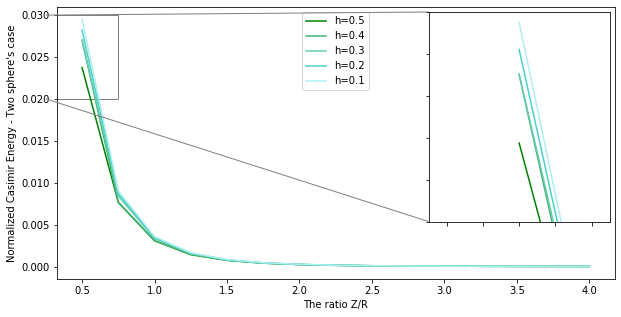

In [17]:
import seaborn as sns
import itertools
#palette = itertools.cycle(sns.color_palette('Blues')) #color=next(palette)

fig, ax = plt.subplots(figsize=(10,5)) # create a new figure with a default 111 subplot
ax.plot(surf_dist, Casimir_energy[:,0], color='g')
ax.plot(surf_dist, Casimir_energy[:,1], color='mediumseagreen')
ax.plot(surf_dist, Casimir_energy[:,2], color='mediumaquamarine')
ax.plot(surf_dist, Casimir_energy[:,3], color='mediumturquoise')
ax.plot(surf_dist, Casimir_energy[:,4], color='paleturquoise')
ax.legend(['h=0.5','h=0.4','h=0.3','h=0.2','h=0.1'],loc='upper center')
plt.ylabel('Normalized Casimir Energy - Two sphere\'s case')
plt.xlabel('The ratio Z/R')

from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes
axins = zoomed_inset_axes(ax, 2.5, loc=1)
axins.plot(surf_dist, Casimir_energy[:,0], color='g')
axins.plot(surf_dist, Casimir_energy[:,1], color='mediumseagreen')
axins.plot(surf_dist, Casimir_energy[:,2], color='mediumaquamarine')
axins.plot(surf_dist, Casimir_energy[:,3], color='mediumturquoise')
axins.plot(surf_dist, Casimir_energy[:,4], color='paleturquoise')


x1, x2, y1, y2 = 0.25, 0.75, 0.020, 0.030 # specify the limits
axins.set_xlim(x1, x2) # apply the x-limits
axins.set_ylim(y1, y2) # apply the y-limits
plt.yticks(visible=False)
plt.xticks(visible=False)
from mpl_toolkits.axes_grid1.inset_locator import mark_inset
mark_inset(ax, axins, loc1=2, loc2=3, fc="none", ec="0.5")
